## Carga y visualización del dataset

In [ ]:
## Montamos el Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Cargamos las librerias que necesitaremos

import pickle
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines

In [ ]:
## Cargamos el pkl (path = Mi unidad/DIPLODATOS2023/my_df.pkl)

my_path='Diplodatos/mentoria/DIPLODATOS2023'
with open('/content/drive/MyDrive/'+ my_path +'/my_df.pkl', 'rb') as f:
    df = pickle.load(f)

In [ ]:
## Visualizamos nuestro dataset

print('El tamaño del dataset es: ', np.shape(df))

df.head()

El tamaño del dataset es:  (500000, 44)


,Ice_level_0,Ice_level_1,Ice_level_2,Ice_level_3,Ice_level_4,Ice_level_5,Ice_level_6,Ice_level_7,Ice_level_8,Ice_level_9,...,Ice_level_34,Ice_level_35,Ice_level_36,Ice_level_37,Ice_level_38,Ice_level_39,CTT,LPI,MDBZ,LIGHT
0,3.500155e-09,4.791711e-09,7.374535e-09,1.269512e-08,2.434341e-08,5.313200e-08,1.337800e-07,3.741376e-07,0.000001,0.000003,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,219.479904,1.952780,35.446011,2.0
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,8.551696e-39,0.0,0.0,0.0,0.0,0.0,302.756256,0.000000,-30.000000,0.0
2,7.756208e-09,1.021012e-08,1.494804e-08,2.429424e-08,4.375806e-08,8.923603e-08,2.090660e-07,5.440743e-07,0.000002,0.000004,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,220.608337,19.960594,37.217461,1.0
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,8.553935e-39,0.0,0.0,0.0,0.0,0.0,302.795898,0.000000,-30.000000,0.0
4,1.205342e-08,1.580202e-08,2.297637e-08,3.692911e-08,6.540716e-08,1.302441e-07,2.953905e-07,7.374948e-07,0.000002,0.000005,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,217.202332,30.202955,40.346878,2.0


## Analisis del dataset

Antes de proceder a la eleccion del algoritmo de ML es necesario analizar el dataset. El analisis consiste en ver si hay consistencia en los datos, si hay datos perdidos y si los datos se relacionan de alguna manera o son independientes. El objetivo final es decidir si es realmente necesario emplear todos los datos para entrenar nuestro algoritmo o si podemos prescindir de algunos de ellos.

En nuestro caso, el dataset contiene 44 columnas. Las primeras 40 columnas brindan información acerca de la cantidad de hielo disponible en una columna del dominio. Las columnas restantes son la temperatura de tope de nube (CTT), el "lightning potential index" (LPI), la reflectividad maxima en la columna (MDBZ) y la ultima columna es la actividad electrica que queremos estimar (LIGHT).

Para explorar el dataset, te propongo las siguientes preguntas:

1. Comenzando con las 40 columnas correspondientes a la cantidad de hielo, Elegí 4 columnas del dominio (o sea 4 filas del dataset), dos con gran actividad electrica y dos con actividad electrica nula. Para dichas columnas, ¿Cómo es la distribucion de hielo en funcion de la altura? ¿Qué información relevante puede obtenerse de dicha distribución?

2. Si en vez de usar todas las columnas de hielo, reemplazo esta informacion por algun percentil, ¿Como es la distribucion de esta y de las demas variables en termino de la presencia o ausencia de actividad electrica?

3. Centrandonos en las filas con actividad electrica no nula, realizá Boxplots para cada variable. ¿Hay outliers? Ahora, compará lo obtenido con Boxplots para las filas con actividad eléctrica nula. ¿Se observan cambios predominantes en alguna de las variables debido a la presencia o ausencia de actividad eléctrica?

4. ¿Como es la dependencia de las variables relevantes entre sí? Acá puede ser de ayuda graficar un heatmap usando seaborn.






# Punto 1

Primero vamos a analizar las distribuciones de las siguientes columnas:

- CTT (temp. tope de nube)
- MDBZ (reflectividad maxima en la col)
- LPI (lightning potential index)
- LIGHT (actividad electrica)

In [ ]:
#copia del data frame para manipular
df_copy = df.copy()
Ice_columns = df.columns[:40]

#agrego columnas con informacion de los valores de hielo
df_copy.loc[:,'Ice_values'] = df_copy.loc[:, Ice_columns].values.tolist()

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  ras

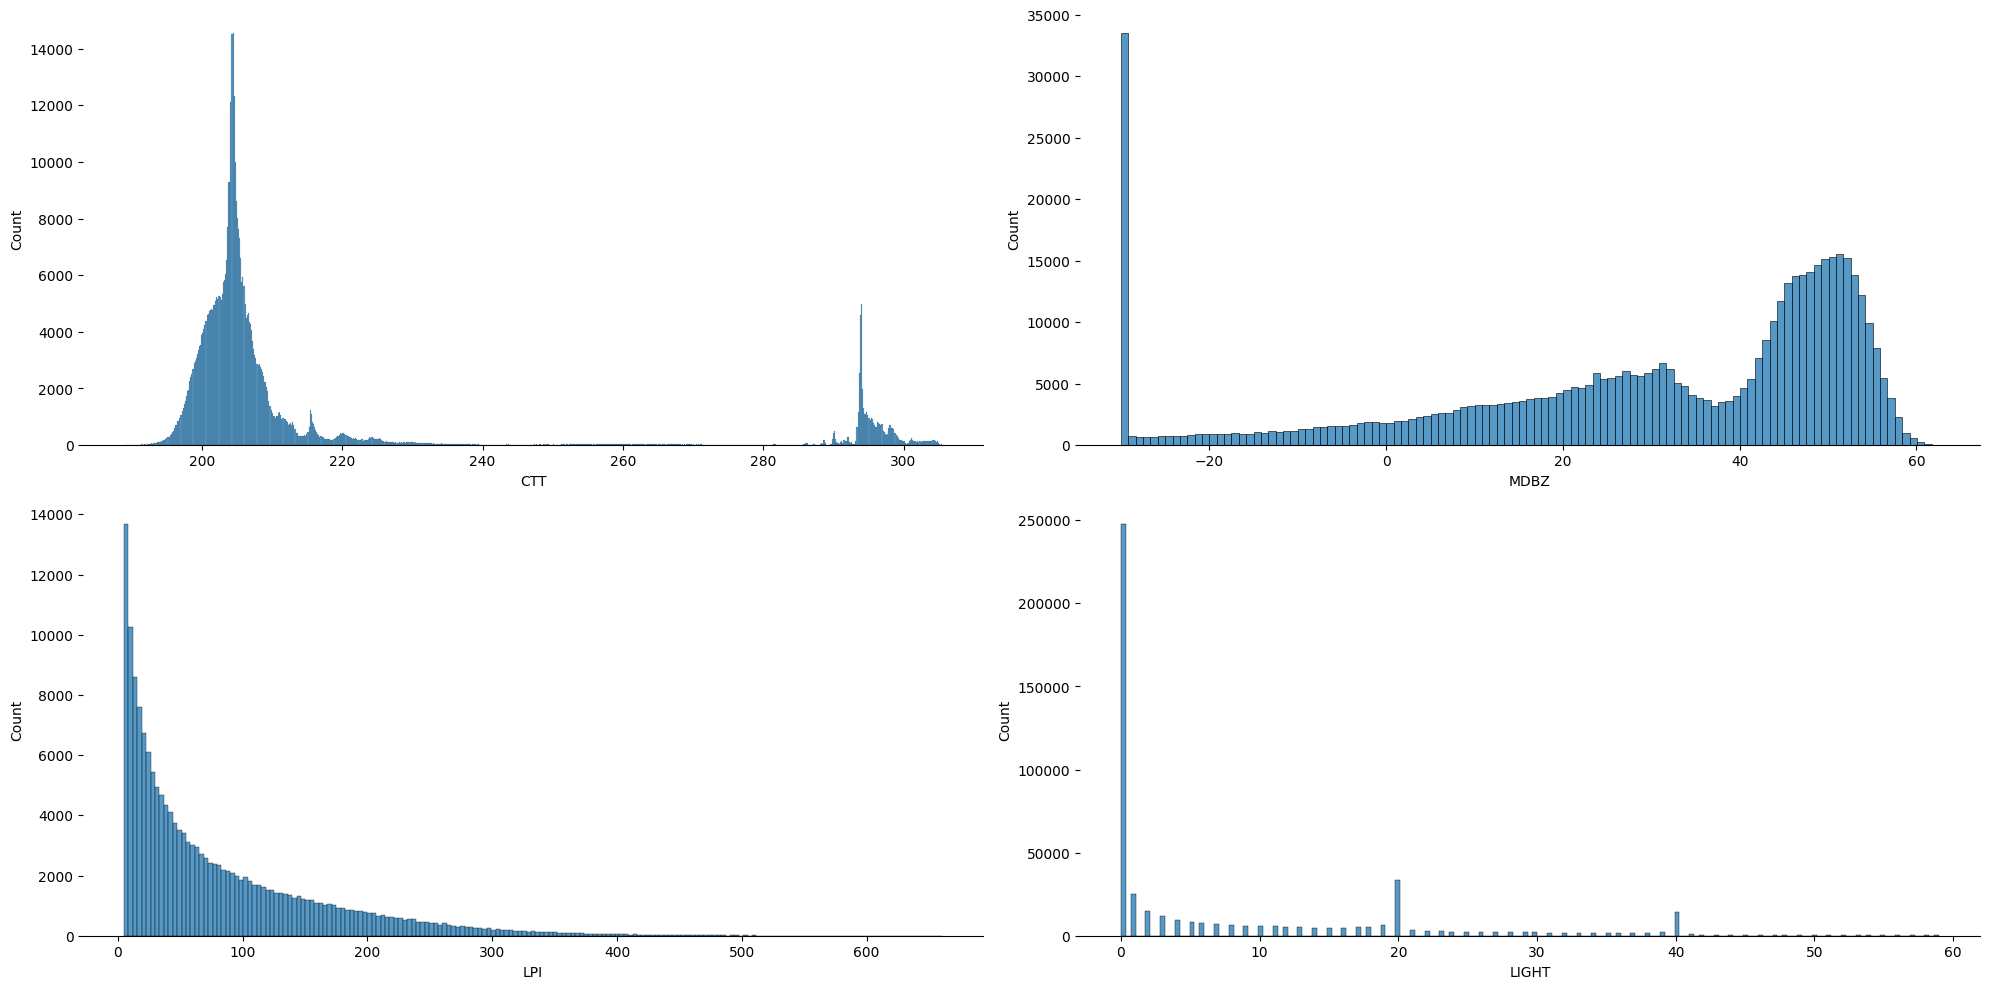

In [ ]:
# uso df_copy
#junto todos los plots en una misma figura
fig, axis = plt.subplots(nrows=2 , ncols=2, figsize=(20,10))
sb.despine(left=True)

# La distribucion de la varible CTT toma valores entre ~200 y ~300.
sb.histplot(df_copy, x='CTT', ax=axis[0,0])
# La distribucion de la varible MDBZ toma valores entre ~-20 y ~60.
sb.histplot(df_copy, x='MDBZ', ax=axis[0,1])
# LPI toma valores entre 0 y ~600
sb.histplot(df_copy[df_copy['LPI'] > 5], x='LPI', ax=axis[1,0])
sb.histplot(df_copy[df_copy['LIGHT'] <  60], x='LIGHT', ax=axis[1,1])

plt.setp(axis)
plt.tight_layout()
plt.show()

Para analizar el comportamiento de las columnas `Ice_level` vamos a considerar:

- 2 columnas que tengan de actividad electrica nula (LIGHT = 0)
- 2 columnas que tengan la mayor actividad electrica del conjunto de datos


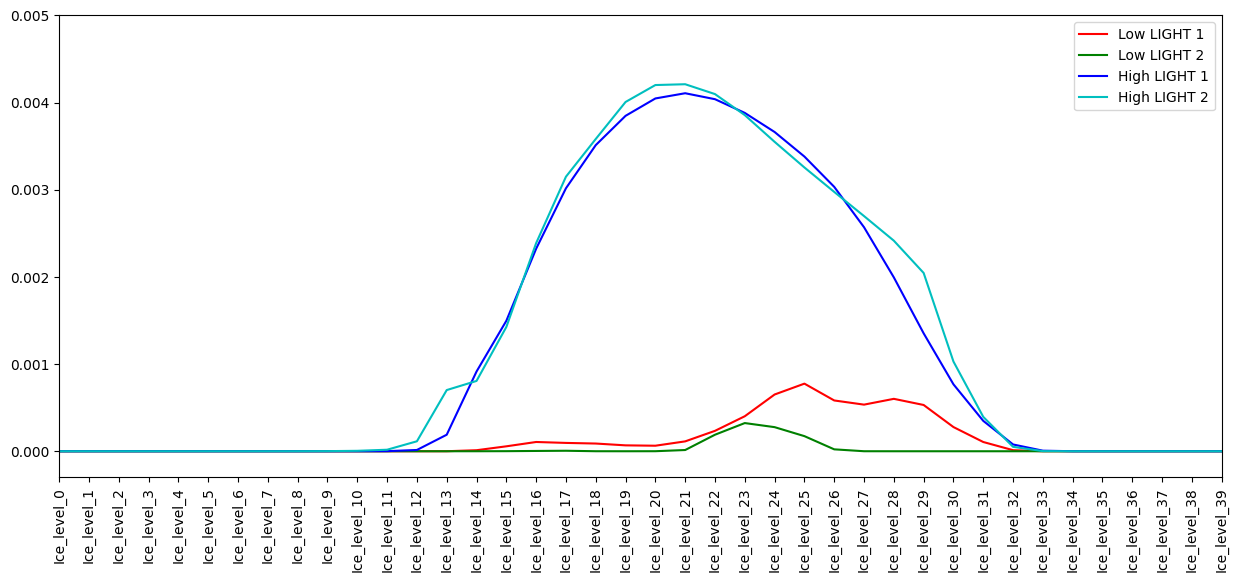

In [ ]:
#extraigo dos sub data frames
df_low = df_copy[df.LIGHT == 0].sample(n=2, random_state=0).reset_index()
df_high = df_copy.sort_values(by='LIGHT', ascending=False)[:2].reset_index()

fig, ax = plt.subplots(figsize=(15,6))
x = range(0,len(Ice_columns))
ax.plot(x, df_low.Ice_values[0], 'r', label='Low LIGHT 1')
ax.plot(x, df_low.Ice_values[1], 'g', label='Low LIGHT 2')
ax.plot(x, df_high.Ice_values[0], 'b', label='High LIGHT 1')
ax.plot(x, df_high.Ice_values[1], 'c', label='High LIGHT 2')

plt.yticks(np.arange(0, 0.006, 0.001))
plt.ylim(-0.0003,0.005)
plt.xlim(0,max(x))
plt.xticks(x, Ice_columns, rotation=90)
plt.margins(tight=True)
plt.legend()
plt.show()

Aparentemente hay una correlacion entre la cantidad de hielo de la columna y la actividad electrica.
A mayor (menor) cantidad de hielo mayor (menor) actividad electrica.

La distribucion de hielo es tal que en los extremos vale cero y alcanza un maxmo a valores intermedios.
Tambien parece haber una dependencia con la altura a la cual se tiene la mayor cantidad de hielo.
Es decir, que a mayor (menor) actividad electrica la maxima cantidad de hielo ocurre a alturas menores (mayores).
Otra observacion que se puede realizar es que no toda altura presenta una concentracion significativa de hielo, en particular los niveles con presencia significativa de hielo se encuentran entre los niveles 10 a 35.

# Punto 2

Ahora agregamos columnas con informacion maximo, percentil 75 y mediana

Con esta informacion generamos un nuevo dataframe `df_droped` usando informacion relevante de los niveles 10 al 35, al calcular las nuevas columnas solo consideramos esos valores.


In [ ]:
#purgo las columnas no relevantes
dropcol = Ice_columns[0:10].append(Ice_columns[36:40])
df_droped = df_copy.drop(columns = dropcol)

Ice_relevant = Ice_columns[10:36]
df_droped.Ice_values = df_droped.loc[:, Ice_relevant].values.tolist()
df_droped.loc[:,'Ice_q75'] = df_copy.Ice_values.apply(np.quantile, args=(0.75,))
df_droped.loc[:,'Ice_median'] = df_copy.Ice_values.apply(np.median)
df_droped.loc[:,'Ice_max'] = df_copy.Ice_values.apply(np.max)

Text(0, 0.5, '')

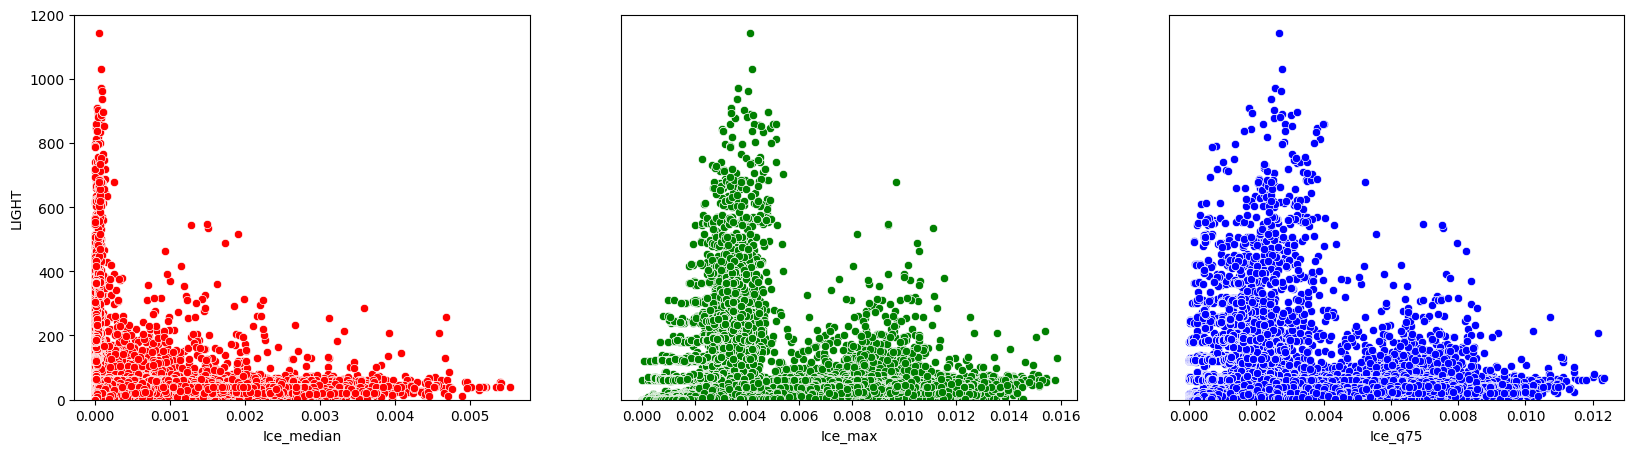

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

sb.scatterplot(df_droped, x='Ice_median', y='LIGHT', color='r', ax=ax[0])
sb.scatterplot(df_droped, x='Ice_max', y='LIGHT', color='g', ax=ax[1])
sb.scatterplot(df_droped, x='Ice_q75', y='LIGHT', color='b', ax=ax[2])
ax[0].set_ylim([0,1200])
ax[1].set_ylim([0,1200])
ax[2].set_ylim([0,1200])
ax[1].set_yticks([])
ax[1].set_ylabel('')
ax[2].set_yticks([])
ax[2].set_ylabel('')

En todas las evaluaciones la dependencia del valor `LIGHT` son semejantes: un pico de actividad electrica en valores bajos del valores representativo de concentracion de hielo seguido por una conducta creciente de la actividad electrica.

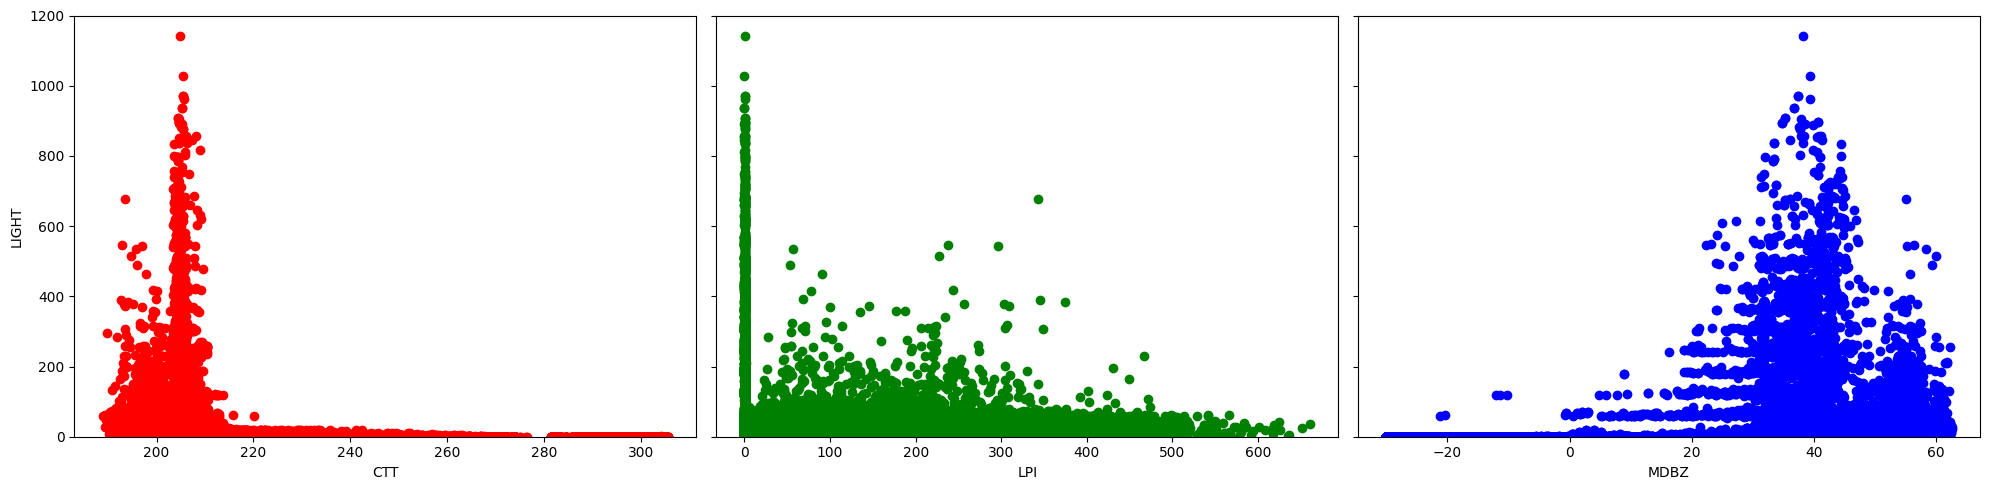

In [ ]:
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)

ax[0].scatter(df_droped.CTT.values.tolist(), df_droped.LIGHT.values.tolist(), color='r')
ax[0].set_xlabel('CTT')
ax[0].set_ylabel('LIGHT')
ax[1].scatter(df_droped.LPI.values.tolist(), df_droped.LIGHT.values.tolist(), color='g')
ax[1].set_xlabel('LPI')
ax[1].set_yticklabels([])
ax[2].scatter(df_droped.MDBZ.values.tolist(), df_droped.LIGHT.values.tolist(), color='b')
ax[2].set_xlabel('MDBZ')
ax[2].set_yticklabels([])

ax[0].set_ylim([0,1200])
ax[1].set_ylim([0,1200])
ax[2].set_ylim([0,1200])

plt.tight_layout()
plt.show()

Se puede ver que la actividad electrica se encuentra presente para valores bajos de `CTT`, sucede algo similar en el caso del `LPI` pero presenta un rango amplio en donde tambien se puede encontrar actividad electrica pero en menor medida, tambien que a partir de una reflectividad maxima positiva incrementa la presencia de actividad electrica.

# Punto 3

En este analisis vamos a comparar boxplots de cada una de las variables teniendo en cuenta si la entrada tiene actividad electrica o no.

Para eso, agregamos una nueva columna `actividad_electrica`.
Esta columna vale 'Nula' si para esa fila (columna del dominio) LIGHT es cero,
y 'No nula' si para esa fila LIGHT es distinto de cero.

In [ ]:
def aux_function(x):
  if (x != 0.):
    return 'No nula'
  else:
    return 'Nula'

boxplt_data = df_droped.drop(columns=Ice_relevant)
#boxplt_data['LIGHT_activity'] = pd.cut(boxplt_data.LIGHT, [0, 0.01, 2000], labels=['=0', '/=0'])
boxplt_data['actividad_electrica'] = pd.DataFrame([ aux_function(item) for item in boxplt_data.LIGHT ])

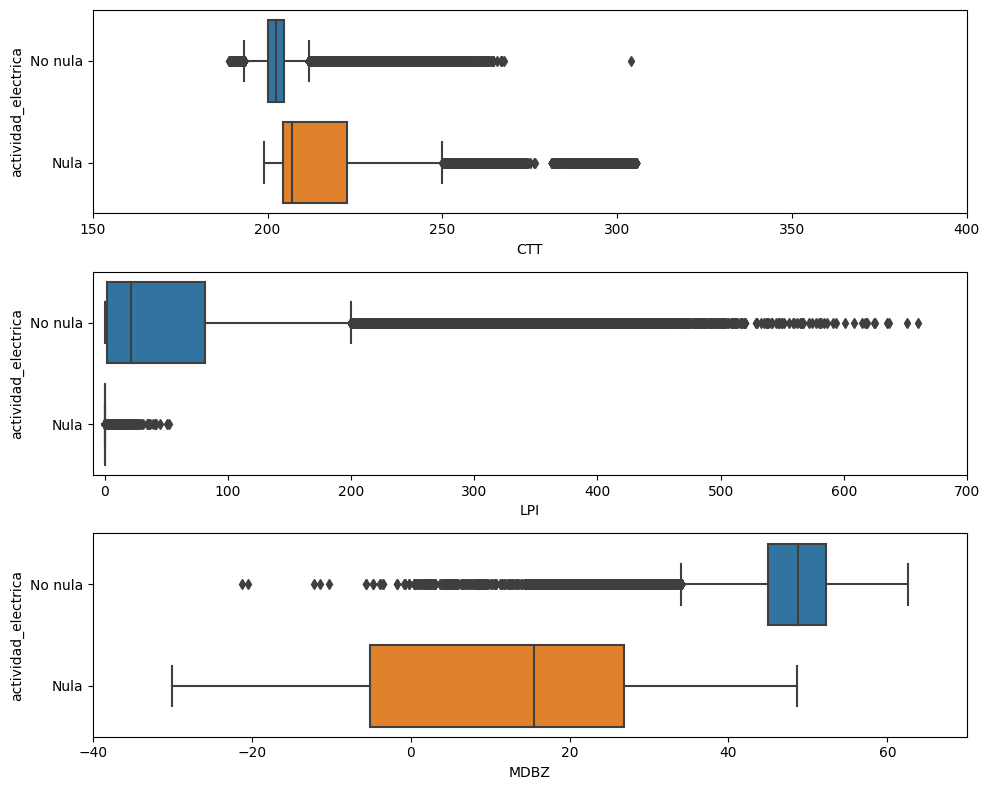

In [ ]:
fig, axis = plt.subplots(nrows = 3, figsize=(10,8))
sb.boxplot(data=boxplt_data, x='CTT', ax=axis[0], y='actividad_electrica')
axis[0].set_xlim([150,400])
sb.boxplot(data=boxplt_data, x='LPI', ax=axis[1], y='actividad_electrica')
axis[1].set_xlim([-10,700])
sb.boxplot(data=boxplt_data, x='MDBZ', ax=axis[2], y='actividad_electrica')
axis[2].set_xlim([-40,70])

plt.tight_layout()

Se aprecia que para cada variable, hay una fuerte presencia de outliers independiente de si hay o no presencia de actividad electrica a exepcion de `MDBZ` con actividad nula.

Donde se hace mas notable esto es para las variables `MDBZ` y `LPI` cuando hay actividad electrica superando por mucho el rango intercuartilico.

Algunas conclusiones:

- para que exista actividad electrica es necesaria la presencia de hielo en la columna (esto se comprueba en tres casos considerados: `Ice_median`, `Ice_q75` y `Ice_max`).

- en los casos en que la actividad electrica es no nula, en general la CTT es menor que en los casos en que la actividad electrica es nula.

- en los casos en que la actividad electrica es nula, LPI es cercano a cero (o cero). Por tanto, para tener actividad electrica esta varible debe ser mayor a cero.

- se observa que para actividad electrica nula, MDBZ toma valores entre ~ (-20, 40), mientras que tener actividad electrica requiere valores de MDBZ entre ~ (40, 60).


# Punto 4

Por ultimo, analizamos como dependen entre si las siguientes varibles:

- `Ice_median`, `LPI`, `CTT`, `MDBZ` y `LIGHT`.

Dado a que nos interesa saber si hay actividad electrica bajo cierto criterio, se graficara los valores de `LIGHT` menores a 200, a modo de considerar aquellos datos representativos solamente.
Tambien para reducir el volumen de datos, se consideraran los valores de `LIGHT` menores a 10 como actividad nula, por lo que se omitiran estos valores

In [ ]:
# Vamos a analizar la dependencia de la variable LIGHT con el resto de varibles:
# Ice_level_median, LPI, CTT, MDBZ
# Consideramos valores de LIGHT menores que 200.

boxplt_data = boxplt_data[boxplt_data.LIGHT < 200]
boxplt_data = boxplt_data[boxplt_data.LIGHT > 10].sort_values(by='LIGHT')

<Axes: xlabel='MDBZ', ylabel='LPI'>

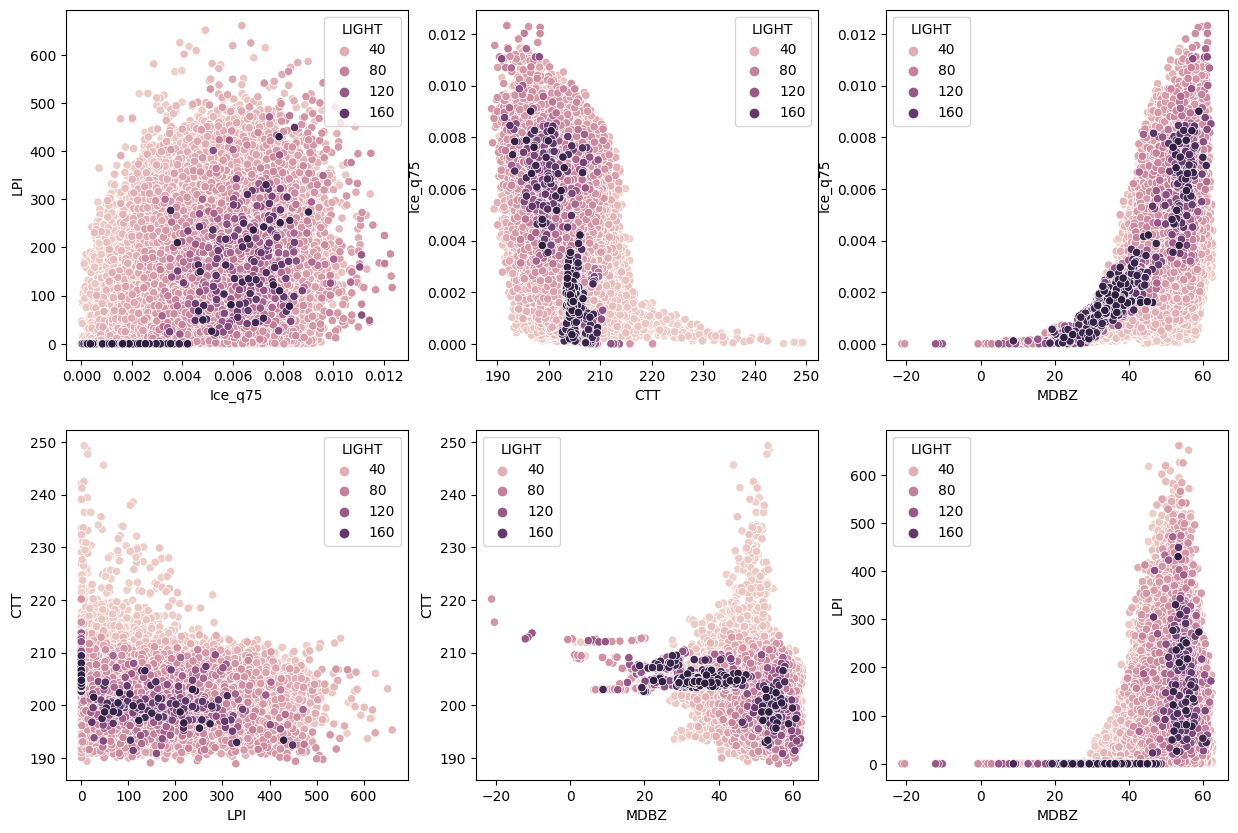

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

# 'LIGHT' vs 'Ice_level_median' y 'LPI'
sb.scatterplot(data=boxplt_data, x='Ice_q75', y='LPI', hue='LIGHT', ax=ax[0,0])

# 'LIGHT' vs 'Ice_level_median' y 'CTT'
sb.scatterplot(data=boxplt_data, y='Ice_q75', x='CTT', hue='LIGHT', ax=ax[0,1] )

# 'LIGHT' vs 'Ice_level_median' y 'MDBZ'
sb.scatterplot(data=boxplt_data, y='Ice_q75', x='MDBZ', hue='LIGHT', ax=ax[0,2] )

# 'LIGHT' vs 'CTT' y 'LPI'
sb.scatterplot(data=boxplt_data, y='CTT', x='LPI', hue='LIGHT', ax=ax[1,0] )

# 'LIGHT' vs 'CTT' y 'MDBZ'
sb.scatterplot(data=boxplt_data, y='CTT', x='MDBZ', hue='LIGHT', ax=ax[1,1] )

# 'LIGHT' vs 'LPI' y 'MDBZ'
sb.scatterplot(data=boxplt_data, y='LPI', x='MDBZ', hue='LIGHT', ax=ax[1,2] )

Se puede ver que las variables que resultan mejores candidatas para determinar el valor de `LIGHT` son `Ice_q75` y `MDBZ` dado a que `LIGHT` expresa una tendencia aparentemente creciente.


<Axes: xlabel='MDBZ', ylabel='Ice_q75'>

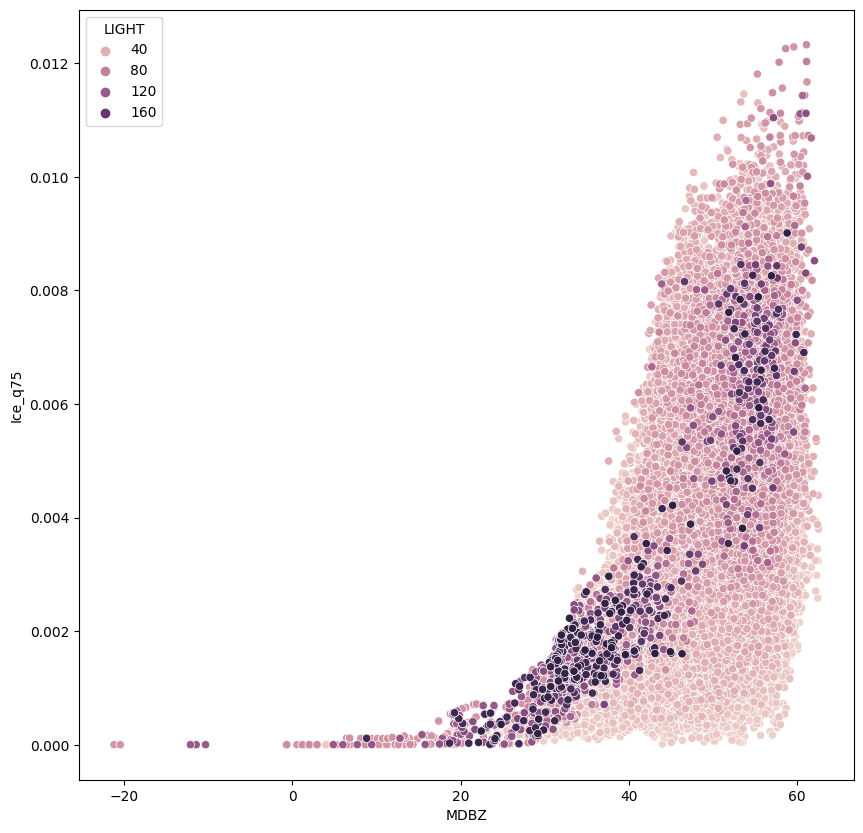

In [ ]:
plt.figure(figsize=(10,10))
sb.scatterplot(data=boxplt_data, y='Ice_q75', x='MDBZ', hue='LIGHT' )

# Conclusión

A modo de resumen, se puede concluir que no es necesario considerar todas los niveles de hielo, que estas pueden ser reemplazadas por un unico valor representativo de la columna del dominio. Ademas de que no en todo nivel se encuentra informacion útil para nuestro analisis.

Por otro lado, pudimos determinar que los mejores candidatos para implementarse a la hora de predecir la variable `LIGHT` son la variable representativa de los niveles de hielo (en nuestro caso `Ice_q75`, el percentil 75) y `MDBZ`.

Otro aporte importante esta en el echo de que no es necesario considerar todo valor de `LIGHT` y que con considerar un threshold de un maximo de valor 200, es suficiente para establecer un analisis sobre el conjunto de datos.